Your Name and PRN:
- Name : Kunal Kurve
- PRN  : 240340128012
- Date : 16-05-2024

# Image Processing with Neural Network
## Assignment 02


## Take Perceptron implementation notebook and add sigmoid activation function

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Setup Global Parameters

In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) 

NOISE = 0.2
EPOCHS = 200 
ALPHA = 0.1  
N_SAMPLES = 1000

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [3]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=0.1, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.79254123,  0.81852609],
        [-0.86341583,  0.77353281],
        [ 1.94098477,  0.40538635],
        [-0.96149236,  0.06064943],
        [-0.98373033,  0.05715389]]),
 array([0, 0, 1, 0, 0], dtype=int64))

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [4]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.792541,0.818526,0
1,-0.863416,0.773533,0
2,1.940985,0.405386,1
3,-0.961492,0.060649,0
4,-0.983730,0.057154,0


## Prediction using Step Functions

In [5]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [6]:
def predict(row, weight) :
    z = weight[0]
    for i in range(len(row) - 1) :
        z += weight[i+1] * row[i] 
    a = 1 / (1 + np.exp(-z))

    return a

In [7]:
wgts = np.array([0.1, 2.0, 1.0])
predict(data_train[0], wgts)

0.924394405952314

In [8]:
def train_weight(train, n_epochs, alpha) :
    error = []
    weight = rng.random(train.shape[1]) # Weight at random
    m = train.shape[0]  # Number of rows in training data
    for epoch in range(n_epochs):
        sum_error = 0.0

        for row in train :
            prediction = predict(row, weight)
            dz = prediction - row[-1]
            sum_error += row[-1] * np.log(prediction)
            weight[0] = weight[0] - alpha * dz / m

            for i in range(len(row) - 1) :
                weight[i + 1] = weight[i + 1] - alpha * dz * row[i] / m

        error.append(sum_error / m)
    return error, weight
 

In [9]:
errors, weights = train_weight(data_train, EPOCHS, ALPHA)
weights

array([-0.22992158,  1.25299398, -1.72340796])

In [10]:
errors

[-0.22028701623411093,
 -0.22022549753971415,
 -0.22015887118011052,
 -0.2200869361810712,
 -0.22000952129160964,
 -0.21992648390313946,
 -0.21983770888022353,
 -0.21974310731732952,
 -0.21964261523577253,
 -0.21953619223465506,
 -0.21942382010902878,
 -0.2193055014478037,
 -0.2191812582231143,
 -0.21905113038194857,
 -0.21891517444988148,
 -0.21877346215577534,
 -0.2186260790852725,
 -0.21847312336992836,
 -0.21831470441783396,
 -0.2181509416906198,
 -0.21798196353085222,
 -0.21780790604295427,
 -0.2176289120300074,
 -0.21744512998806037,
 -0.217256713158904,
 -0.21706381864168675,
 -0.21686660656320172,
 -0.2166652393062372,
 -0.21645988079495934,
 -0.2162506958359746,
 -0.2160378495134178,
 -0.21582150663620192,
 -0.21560183123535134,
 -0.21537898610923287,
 -0.2151531324143617,
 -0.21492442929942351,
 -0.21469303358009123,
 -0.21445909945221947,
 -0.2142227782410076,
 -0.21398421818375277,
 -0.21374356424386573,
 -0.21350095795388538,
 -0.2132565372852923,
 -0.21301043654301885,
 -

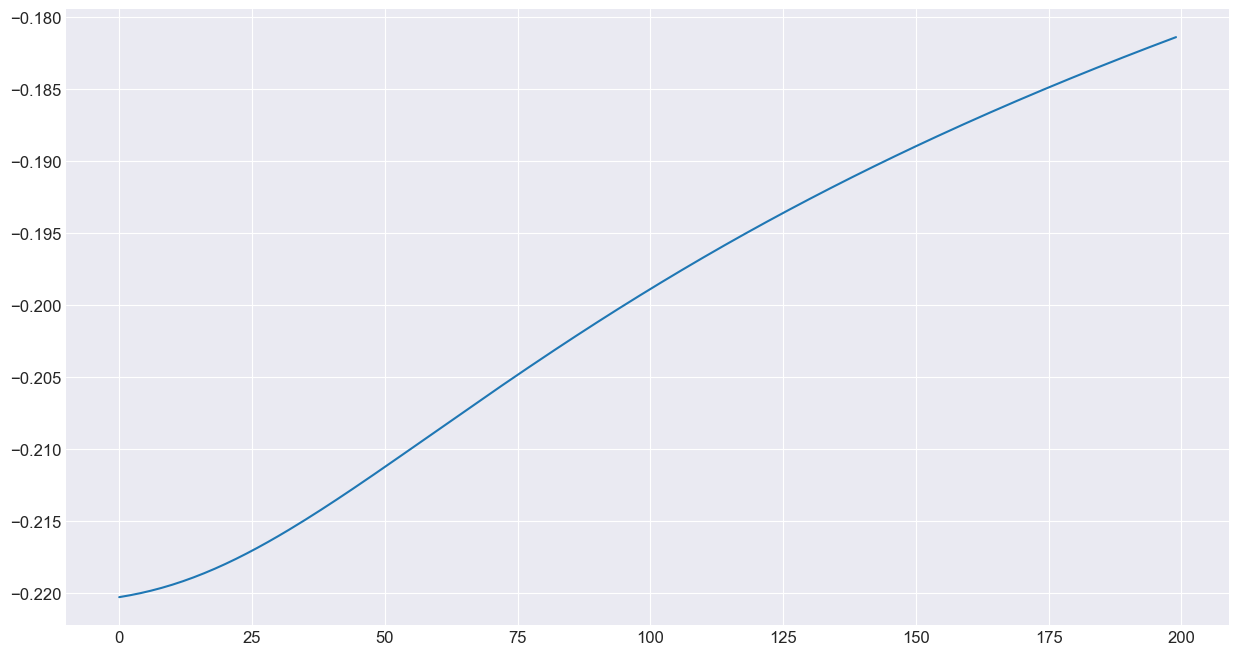

In [11]:
plt.plot(errors);

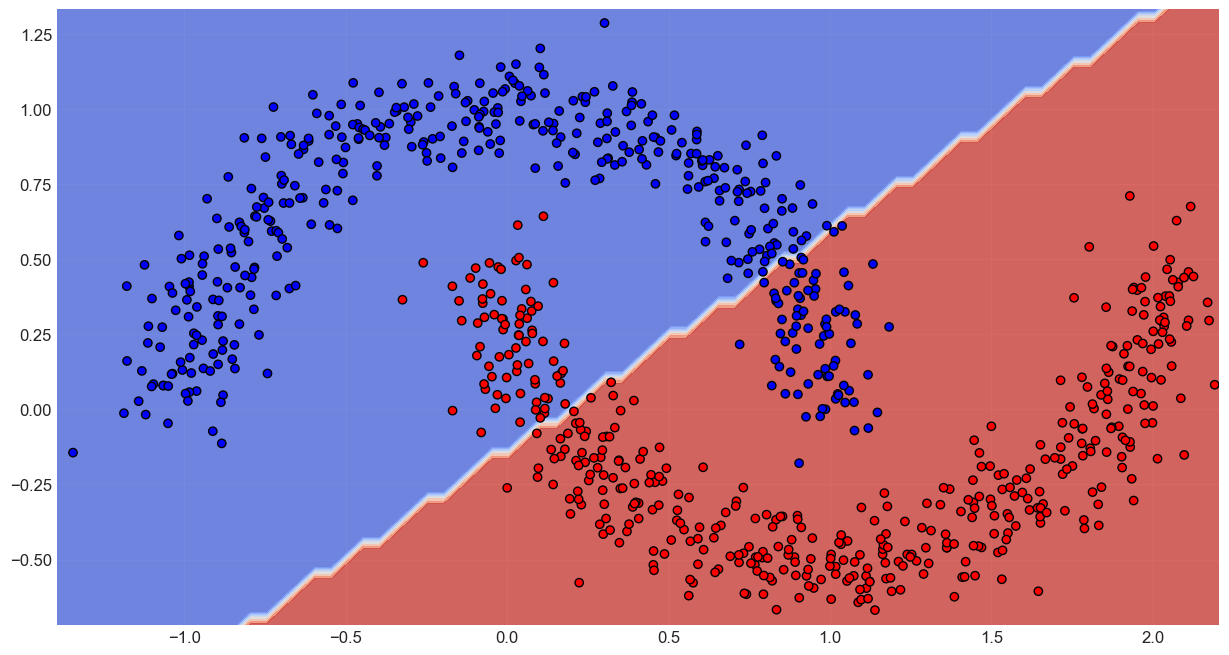

In [12]:
X = data_train

fig, ax = plt.subplots()

dm = 0.05

x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + 0.05
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05

xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), np.arange(y_min, y_max, dm))

XX = np.c_[xx.ravel(), yy.ravel()]

XX = np.hstack((XX, np.ones((XX.shape[0], 1))))

y_pred = []

for row in XX:
    pred = predict(row, weights)
    round_y = 1 if pred>=0.5 else 0
    y_pred.append(round_y)

Z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx, yy, Z, cmap = CMAP, alpha = 0.8)
ax.scatter(X[:, 0], X[:, 1], c = X[:, 2], edgecolors='k', cmap=plt.cm.bwr)
plt.show()

Train Data

In [13]:
prediction = []

for row in data_train :
    pred = predict(row, weights)
    y_pred = 1 if pred>=0.5 else 0
    prediction.append(y_pred)
accuracy_score(data_train[:, -1], prediction)

0.8266666666666667

Test Data

In [14]:
prediction = []

for row in data_test :
    pred = predict(row, weights)
    y_pred = 1 if pred>=0.5 else 0
    prediction.append(y_pred)
accuracy_score(data_test[:, -1], prediction)

0.88

In [15]:
cm = confusion_matrix(data_test[:, -1], prediction)
cm

array([[53,  5],
       [ 7, 35]], dtype=int64)

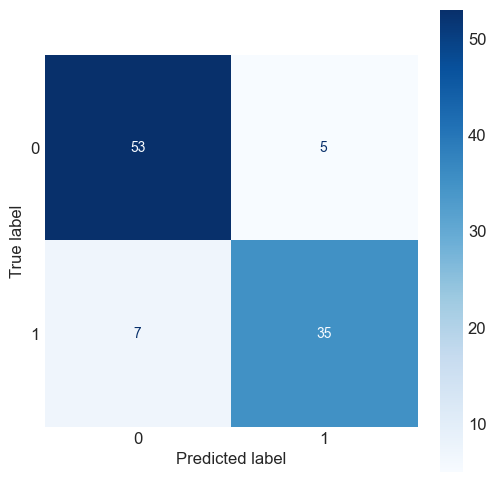

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

fig, ax = plt.subplots(figsize = (6, 6))

disp.plot(ax = ax, cmap='Blues')
ax.grid(False)